In [1]:
from sklearn.model_selection import train_test_split, learning_curve
import os
import cv2

In [2]:
os.chdir("C:\\Users\\ADMIN\\FingerprintClassification\\model")

In [3]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from tqdm import tqdm
from feature_extract.BoW import final_bow_feature, image_preprocessing, extract_sift, bow_vector
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
X_features, Y = final_bow_feature()

In [6]:

X_train = []
X_test = []
Y_train = []
Y_test = []
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size = 0.2, random_state=42)
print(len(X_train), " ", len(X_test))

6400   1600


In [7]:
def cross_validation(estimator, scoring):
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=5, n_jobs=-1, train_sizes=[1.0, ], scoring=scoring)
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std
def plot(title, xlabel, X_plot, Y_plot, error):
    X_new = np.array(X_plot)
    Y_new = np.array(Y_plot)
    #Y_HEHEHE = np.array(Y_HEEE)
    errors = np.array(error)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel("Point")
    plt.plot(X_new,Y_new, color = "black", label = "Train accuracy")
    #plt.plot(X_new,Y_HEHEHE, color = "blue", label = "Validating accuracy")
    plt.fill_between(X_new,Y_new-errors, Y_new+errors, color = "gray")
    plt.legend()

100%|██████████| 4/4 [00:33<00:00,  8.39s/it]


[]

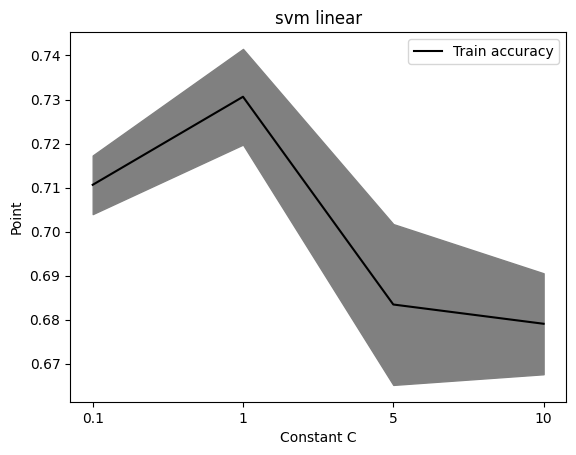

In [21]:
# How to choose the best hyper-parameters using cross-validation k-fold and save the figure
title = "svm linear"
xlabel = "Constant C"
X_plot = []
Y_plot = []
error = []
#Y_HEEE = []
for n in tqdm([0.1, 1, 5, 10]):
    clf = SVC(kernel='rbf', C=30, gamma=n)
    mean, std = cross_validation(clf, "accuracy")
    clf.fit(X_train,Y_train)
    #y_pred_valid = clf.predict(X_valid)
    X_plot.append(str(n))
    Y_plot.append(mean)
    error.append(std)
    #Y_HEEE.append(accuracy_score(y_pred_valid,y_valid))
plot(title, xlabel, X_plot, Y_plot, error)
plt.plot()
#plt.savefig('images/svm/svm_linear_' + classify_type + ".png", bbox_inches='tight')

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [10]:
clf = AdaBoostClassifier(algorithm='SAMME')
clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

0.72109375
0.724375


In [15]:
rf = RandomForestClassifier(n_estimators=20, max_depth = 25)
rf.fit(X_train, Y_train)
print(rf.score(X_train, Y_train))
print(rf.score(X_test, Y_test))

0.9959375
0.761875


In [14]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Tính các chỉ số
print("Báo cáo đánh giá trên tập huấn luyện:")
print(classification_report(Y_train, y_pred_train))

print("Báo cáo đánh giá trên tập kiểm tra:")
print(classification_report(Y_test, y_pred_test))

Báo cáo đánh giá trên tập huấn luyện:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3204
           1       1.00      1.00      1.00      3196

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400

Báo cáo đánh giá trên tập kiểm tra:
              precision    recall  f1-score   support

           0       0.75      0.68      0.72       796
           1       0.71      0.77      0.74       804

    accuracy                           0.73      1600
   macro avg       0.73      0.73      0.73      1600
weighted avg       0.73      0.73      0.73      1600



In [16]:
sv = SVC(kernel = 'rbf')
sv.fit(X_train, Y_train)
print(sv.score(X_train, Y_train))
print(sv.score(X_test, Y_test))

0.7896875
0.78875


In [17]:

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier().fit(X_train, Y_train)
print(dtree.score(X_train, Y_train))
print(dtree.score(X_test, Y_test))

1.0
0.678125


In [19]:
reg = LinearRegression().fit(X_train, Y_train)
print(reg.score(X_train, Y_train))
print(reg.score(X_test, Y_test))

0.29461511961875264
0.30391285756869457


In [20]:
log = LogisticRegression().fit(X_train, Y_train)
print(log.score(X_train, Y_train))
print(log.score(X_test, Y_test))

0.7321875
0.741875


In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
print(knn.score(X_train, Y_train))
print(knn.score(X_test, Y_test))

0.7971875
0.765


In [18]:
from feature_extract.BoW import pca_sift

In [21]:
testing = []
for label in os.listdir(os.path.join("..//testjuan")):
    img = cv2.imread(os.path.join('..//testjuan',label))
    testing.append(img)
    print(label)
    #bbbb = cv2.imread("anhtest2.png")
my_X=image_preprocessing(testing)
#my_X=[bbbb]
my_image_descriptor = extract_sift(my_X)
my_image_descriptor_pca = pca_sift(my_image_descriptor)
BoW = pickle.load(open('ml_data/bow_vector_pca.pkl', 'rb'))
num_cluster = 30
my_X_features = bow_vector(my_image_descriptor_pca, BoW, num_cluster)

r0.jpg
r1.jpg
s0.png
s01.png
s1.png
s2.png
s4.jpg
s5.jpg
t1.png
t3.png
t4.png
t5.png
t6.png


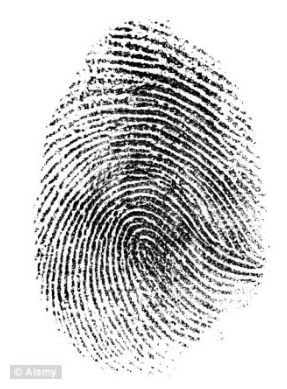

In [42]:
#aaaa=cv2.imread("SOCOFing\\Altered\\Altered-Medium\\6__M_Right_index_finger_CR.BMP")
bbbb = cv2.imread("C:\\Users\\ADMIN\\Fingerprint_Recognition_GROUP8\\test_image\\anhtest1.png")
#print(bbbb)
#bbbb=preprocessing_normal(aaaa)
plt.imshow(bbbb, cmap='gray')
plt.axis("off")
my_X=[bbbb]
processed_img = image_preprocessing(my_X)

image_descriptors = extract_sift(processed_img)
BoW = pickle.load(open('ml_data/bow_dic.pkl', 'rb'))
my_X = bow_vector(image_descriptors, BoW, 50)

In [22]:
ypred = sv.predict(my_X_features)
print(ypred)
ypred2 = rf.predict(my_X_features)
print(ypred2)

[1 1 1 1 0 1 0 1 0 0 1 1 1]
[0 0 1 1 0 1 0 0 1 0 1 1 1]
